<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Desafio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn.cluster import k_means,dbscan,mean_shift,estimate_bandwidth
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale,minmax_scale
import string
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [ ]:
!pip install kmodes

In [ ]:
url = 'https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fe73c934e-cd3a-4e00-85f6-b704762fec77%2Fdata.csv?table=block&id=e9f1a77d-e0db-46c4-8ef0-c79064da3c0e&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2'
df = pd.read_csv(url,encoding='latin1')


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
linhas_nulas_coluna1 = df[df['CustomerID'].isnull()]


In [ ]:
print(linhas_nulas_coluna1)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kin

In [ ]:
df_edit_1=df.dropna(subset=['CustomerID'])

In [ ]:
df_edit_1.duplicated().sum()

5225

In [ ]:
df_edit_2=df_edit_1.drop_duplicates()

In [ ]:
df_edit_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
DF=df_edit_2.groupby('CustomerID')['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
DF=pd.DataFrame(DF)
DF.head()

,0,1
0,12346.0,61619 1/18/2011 10:01 61624 1/18/2011 10...
1,12347.0,14938 12/7/2010 14:57 14939 12/7/2010 ...
2,12348.0,34083 12/16/2010 19:09 34084 12/16/201...
3,12349.0,485502 11/21/2011 9:51 485503 11/21/2011...
4,12350.0,80323 2/2/2011 16:01 80324 2/2/2011 16:0...


In [ ]:
df_edit_2['InvoiceDate']=pd.to_datetime(df_edit_2['InvoiceDate'])

<ipython-input-13-776d2c34dfcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit_2['InvoiceDate']=pd.to_datetime(df_edit_2['InvoiceDate'])


In [ ]:
df_edit_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
data_referencia = df_edit_2['InvoiceDate'].max()
#utilizamos a data mais recente

In [ ]:
recency = df_edit_2.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_referencia - x.max()).days,'Country': 'first'
}).rename(columns={'InvoiceDate': 'Recency'})


In [ ]:
frequency = df_edit_2.groupby('CustomerID').agg({
    'InvoiceDate': 'count'
}).rename(columns={'InvoiceDate': 'Frequency'})


In [ ]:
df_edit_2['TotalPrice'] = df_edit_2['Quantity'] * df_edit_2['UnitPrice']
monetary = df_edit_2.groupby('CustomerID').agg({
    'TotalPrice': 'sum'
}).rename(columns={'TotalPrice': 'Monetary'})

<ipython-input-18-c44d7bad7076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit_2['TotalPrice'] = df_edit_2['Quantity'] * df_edit_2['UnitPrice']


In [ ]:
df_rfm = recency.join(frequency).join(monetary)

In [ ]:
df_rfm.head()

,Recency,Country,Frequency,Monetary
CustomerID,,,,
12346.0,325,United Kingdom,2,0.00
12347.0,1,Iceland,182,4310.00
12348.0,74,Finland,31,1797.24
12349.0,18,Italy,73,1757.55
12350.0,309,Norway,17,334.40


In [ ]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.047118,91.858188,1893.531433
std,100.765435,229.223566,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,17.000000,291.795000
50%,49.000000,41.000000,644.070000
75%,142.000000,99.250000,1608.335000
max,373.000000,7812.000000,279489.020000


In [ ]:
df_rfm_0=(df_rfm['Monetary'] == 0)

In [ ]:
(df_rfm_0==True)

CustomerID
12346.0     True
12347.0    False
12348.0    False
12349.0    False
12350.0    False
           ...  
18280.0    False
18281.0    False
18282.0    False
18283.0    False
18287.0    False
Name: Monetary, Length: 4372, dtype: bool

In [ ]:
clientes_monetary_menor_igual_zero = df_rfm[df_rfm['Monetary'] <= 0]
df_rfm_maior_zero=df_rfm[df_rfm['Monetary'] > 0]

In [ ]:
df_rfm_maior_zero.info()
df_logs=df_rfm_maior_zero.copy()

df_logs['Recency']=df_rfm_maior_zero['Recency']
df_logs['Frequency']=np.log(df_logs['Frequency'])
df_logs['Monetary']=np.log(df_logs['Monetary'])
df_logs.describe()
#Optou por não se fazer a parte logarítmica da Recencia pois em caso de um cliente que apenas fez cadastro na plataforma e recebeu algum brinde, isso resultaria num log de zero


<class 'pandas.core.frame.DataFrame'>
Index: 4322 entries, 12347.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4322 non-null   int64  
 1   Country    4322 non-null   object 
 2   Frequency  4322 non-null   int64  
 3   Monetary   4322 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 168.8+ KB


,Recency,Frequency,Monetary
count,4322.000000,4322.000000,4322.000000
mean,89.343591,3.705851,6.519381
std,99.133565,1.308686,1.825839
min,0.000000,0.000000,-33.964212
25%,16.000000,2.890372,5.705772
50%,48.500000,3.737670,6.482075
75%,137.000000,4.615121,7.392720
max,373.000000,8.963416,12.540718


In [ ]:
df_logs.describe()

,Recency,Frequency,Monetary
count,4322.000000,4322.000000,4322.000000
mean,89.343591,3.705851,6.519381
std,99.133565,1.308686,1.825839
min,0.000000,0.000000,-33.964212
25%,16.000000,2.890372,5.705772
50%,48.500000,3.737670,6.482075
75%,137.000000,4.615121,7.392720
max,373.000000,8.963416,12.540718


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
df_logs = remove_outliers(df_logs, 'Recency')
df_logs = remove_outliers(df_logs, 'Frequency')
df_logs = remove_outliers(df_logs, 'Monetary')

<Axes: >

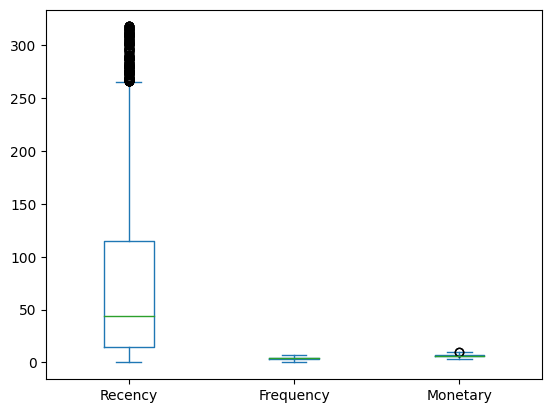

In [ ]:
df_logs.plot.box()

In [ ]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

In [ ]:
count_outliers(df_logs, 'Recency')

214

In [ ]:
df_logs = remove_outliers(df_logs, 'Recency')


In [ ]:
count_outliers(df_logs, 'Recency')

258

In [ ]:
df_logs.describe()
#agora aplicaremos a função is outlier iterativamente até termos no máximo 100 outliers

,Recency,Frequency,Monetary
count,3842.000000,3842.000000,3842.000000
mean,66.360750,3.827491,6.646672
std,69.936368,1.201421,1.149076
min,0.000000,0.693147,3.485845
25%,14.000000,3.044522,5.812614
50%,39.000000,3.850148,6.594660
75%,93.000000,4.682131,7.461847
max,265.000000,7.145196,9.917017


In [ ]:
count_outliers(df_logs, 'Frequency')



1

In [ ]:
count_outliers(df_logs, 'Monetary')

0

In [ ]:
df_logs=remove_outliers(df_logs, 'Recency')

In [ ]:
count_outliers(df_logs, 'Recency')

194

In [ ]:
while True:
    c_o=count_outliers(df_logs, 'Recency')
    if c_o > 5:
        df_logs = remove_outliers(df_logs, 'Recency')
    else:
        break

print(c_o)

0


In [ ]:
df_logs.describe()

,Recency,Frequency,Monetary
count,3145.000000,3145.000000,3145.000000
mean,37.654690,3.993797,6.813810
std,33.151356,1.182647,1.131261
min,0.000000,0.693147,3.549617
25%,10.000000,3.258097,6.000672
50%,28.000000,4.043051,6.808487
75%,59.000000,4.820282,7.611110
max,132.000000,7.145196,9.917017


<Axes: >

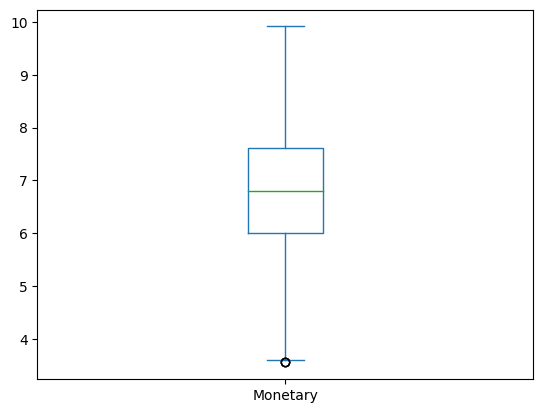

In [ ]:
df_logs['Monetary'].plot.box()


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_logs['Country'] = LabelEncoder().fit_transform(df_logs['Country'])
df_logs.head()

,Recency,Country,Frequency,Monetary
CustomerID,,,,
12347.0,1,12,5.204007,8.368693
12348.0,74,8,3.433987,7.494007
12349.0,18,14,4.290459,7.471676
12352.0,35,18,4.553877,7.343045
12356.0,22,20,4.077537,7.941449


In [ ]:
count_outliers(df_logs, 'Monetary')

3

In [ ]:
from yellowbrick.cluster import kelbow_visualizer


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

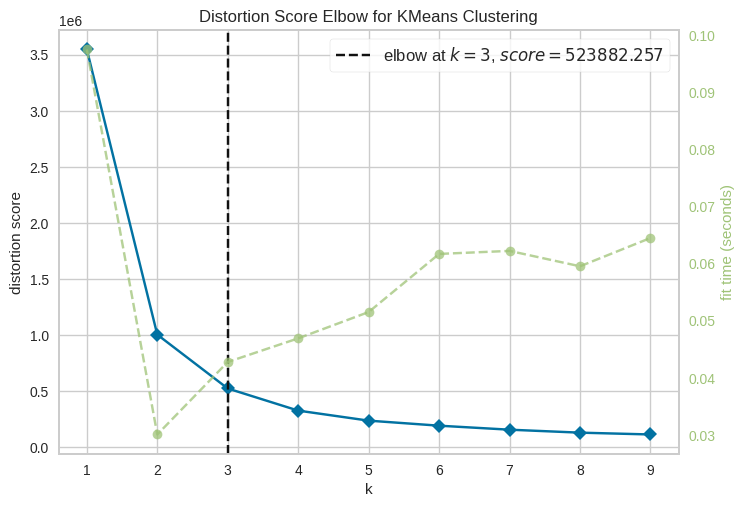

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

In [ ]:
kelbow_visualizer(KMeans(),df_logs,k=(1,10))

In [ ]:
clustermetrics=silhouette_score,davies_bouldin_score,calinski_harabasz_score
cluster_metrics_results=[]
for k in range(3,10):
    model=KMeans(n_clusters=k)
    model.fit_predict(df_logs)
    cluster_results_dict={'k':k}
    cluster_results_dict['intertia']=model.inertia_
    for metric in clustermetrics:
        cluster_results_dict[metric.__name__]=metric(df_logs,model.labels_)
    cluster_metrics_results.append(cluster_results_dict)


cluster_metrics_results


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[{'k': 3,
  'intertia': 523882.25714177213,
  'silhouette_score': 0.5754063292886189,
  'davies_bouldin_score': 0.5712508490179319,
  'calinski_harabasz_score': 9068.260809721865},
 {'k': 4,
  'intertia': 326402.35594912496,
  'silhouette_score': 0.523189340720574,
  'davies_bouldin_score': 0.5965912897944889,
  'calinski_harabasz_score': 10333.526571179642},
 {'k': 5,
  'intertia': 237083.43636358614,
  'silhouette_score': 0.506988435814354,
  'davies_bouldin_score': 0.6247454533600196,
  'calinski_harabasz_score': 10962.282248905369},
 {'k': 6,
  'intertia': 192088.2621072656,
  'silhouette_score': 0.4806028463495242,
  'davies_bouldin_score': 0.6803578240671394,
  'calinski_harabasz_score': 10967.699039378616},
 {'k': 7,
  'intertia': 157021.95512964154,
  'silhouette_score': 0.5160622687568488,
  'davies_bouldin_score': 0.6646878100858489,
  'calinski_harabasz_score': 11294.082526454651},
 {'k': 8,
  'intertia': 130421.79729419907,
  'silhouette_score': 0.5033624947175068,
  'davie

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Purples',subset=['silhouette_score','davies_bouldin_score'])

,intertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
3,523882.257142,0.575406,0.571251,9068.260810
4,326402.355949,0.523189,0.596591,10333.526571
5,237083.436364,0.506988,0.624745,10962.282249
6,192088.262107,0.480603,0.680358,10967.699039
7,157021.955130,0.516062,0.664688,11294.082526
8,130421.797294,0.503362,0.655864,11742.742808
9,113497.700562,0.503584,0.686369,11861.720337


In [ ]:
#assim determinamos que o número ótimo de clusters é 3
model=KMeans(n_clusters=3)
df_logs['label']=model.fit_predict(df_logs)
df_logs.head()
df_logs['label'].value_counts()
model.fit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Country,Frequency,Monetary,label
CustomerID,,,,,
12347.0,1,12,5.204007,8.368693,0
12348.0,74,8,3.433987,7.494007,1
12349.0,18,14,4.290459,7.471676,0
12352.0,35,18,4.553877,7.343045,1
12356.0,22,20,4.077537,7.941449,0


In [ ]:
model.fit(df_logs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
df_logs['label'].value_counts()


label
0    1781
1     902
2     462
Name: count, dtype: int64

In [ ]:
px.scatter_3d(result, x='Recency_y', y='Frequency_y', z='Monetary_y', color=kmeans_labels.astype(str), template='plotly_dark')

In [ ]:
kmeans_labels=result['label']

In [ ]:
df_logs.groupby('label').min()

,Recency,Country,Frequency,Monetary
label,,,,
0,0,0,0.693147,3.566712
1,34,0,0.693147,3.598955
2,77,0,0.693147,3.549617


In [ ]:
result=pd.merge(df_logs,df_rfm,on='CustomerID',how='right')

In [ ]:
result.head()

,Recency_x,Country_x,Frequency_x,Monetary_x,label,Recency_y,Country_y,Frequency_y,Monetary_y
CustomerID,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,325,United Kingdom,2,0.00
12347.0,1.0,12.0,5.204007,8.368693,0.0,1,Iceland,182,4310.00
12348.0,74.0,8.0,3.433987,7.494007,1.0,74,Finland,31,1797.24
12349.0,18.0,14.0,4.290459,7.471676,0.0,18,Italy,73,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,309,Norway,17,334.40


In [ ]:
result.drop(['Recency_x','Country_x','Monetary_x'],axis=1,inplace=True)
result.head()

NameError: name 'results' is not defined

In [ ]:
result.drop(['Frequency_x'],axis=1,inplace=True)

result.head()



,label,Recency_y,Country_y,Frequency_y,Monetary_y
CustomerID,,,,,
12346.0,NaN,325,United Kingdom,2,0.00
12347.0,0.0,1,Iceland,182,4310.00
12348.0,1.0,74,Finland,31,1797.24
12349.0,0.0,18,Italy,73,1757.55
12350.0,NaN,309,Norway,17,334.40


In [ ]:
result['label'].fillna(3, inplace=True)
result.head()

,label,Recency_y,Country_y,Frequency_y,Monetary_y
CustomerID,,,,,
12346.0,3.0,325,United Kingdom,2,0.00
12347.0,0.0,1,Iceland,182,4310.00
12348.0,1.0,74,Finland,31,1797.24
12349.0,0.0,18,Italy,73,1757.55
12350.0,3.0,309,Norway,17,334.40


In [ ]:
result.groupby('label')[['Recency_y','Monetary_y','Frequency_y']].agg(['mean','max','min','median','std'])

Recency_y                              Monetary_y                      \
             mean  max min median        std         mean        max      min   
label                                                                           
0.0     13.613139   33   0   12.0   9.810865  2186.685913   20272.43    35.40   
1.0     53.426829   76  34   52.0  12.290087  1088.235069   17588.26    36.56   
2.0     99.541126  132  77   97.0  16.443601  1010.994048   11056.93    34.80   
3.0    227.900570  373   0  231.0  85.586337  2392.310131  279489.02 -4287.63   

                             Frequency_y                               
        median           std        mean   max min median         std  
label                                                                  
0.0    1244.59   2731.219147  133.482313  1268   2   83.0  154.626045  
1.0     643.18   1392.282146   64.577605   664   2   39.0   71.751081  
2.0     647.24   1212.656584   49.575758   411   2   31.0   53.608382  
3.0     305.10  15062.193551   67.415648  7812   1   19.0  378.704730

In [ ]:
#Label0: Aqui Vemos um perfil de cliente que compra frequentemente, ativo recentemente, com um ticket médio elevado. Considera-se que é um cliente de um poder aquisitivo mais elevado e portanto ações sugeridas são vendas casadas, informação de produtos novidades com alta margem de lucro e exclusividade
#Label1: Temos um perfil com uma recência menor, que compra menos frequentemente e com um ticket médio mais baixo, porém compra com certa frequência(acredita-se que compra algo quando há necessidade). O que é recomendado para esse cliente seriam ações de SEO em redes sociais caso o cliente esteja procurando produtos pertencentes ao nosso e-commerce, e caso seja o caso, oferecer cupons e fornecer infos de promoções .
#Label2: Temos um perfil de certa semelhança para o Label 1 porém com uma recência e frequência menores. Esse cliente compra habitualmente em épocas festivas ou aniversários, o que se recomenda para esse cliente seria cupons especificos para as datas ditas anteriormente
#Label3: Nesse Label colocamos os outliers, então nesse caso recomenda-se estudar individualmente todos os casos constantes nesse label para verificar qual melhor ação para cada um dos casos, visto que não é possível enquadrar em nenhum cluster